# 📊 NBB Bank Stock Price Analysis & Forecasting
**Date:** 2025-06-29

In this notebook, we will analyze historical stock prices of a bank and build a forecasting model to predict future prices.
We will use both statistical and machine learning approaches for forecasting.

# 📊 Bank Stock Price Analysis
This notebook analyzes historical bank stock prices to uncover trends, correlations, and performance patterns.
It uses data visualization, statistical summaries, and comparison metrics.
---

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

## 📥 Load and Inspect the Data

## 1️⃣ Import Required Libraries
We begin by importing the Python libraries needed for data manipulation, visualization, and statistical analysis.
- **pandas** for data handling
- **numpy** for numerical operations
- **matplotlib / seaborn** for plotting
- **yfinance** for fetching historical stock data

In [11]:
df = pd.read_csv('NBB_STOCK.csv')
# Drop empty columns
df = df[['Date', 'Price']]
# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)
df.sort_values('Date', inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Date,Price
0,2000-01-02,0.418
1,2000-01-03,0.418
2,2000-01-05,0.418
3,2000-01-06,0.418
4,2000-01-11,0.416


## 🛠️ Handle Missing Values

## 2️⃣ Fetch Historical Stock Price Data
Using **Yahoo Finance API** via `yfinance`, we download historical stock data for selected banking institutions.
We specify:
- Stock tickers (e.g., BAC, JPM, C)
- Date range
- Frequency of data (daily)

In [12]:
df['Price'].interpolate(method='linear', inplace=True)
df['Price'].fillna(method='bfill', inplace=True)
df['Price'].fillna(method='ffill', inplace=True)

## 📈 Visualize the Stock Price Over Time

## 3️⃣ Inspect Raw Data
We examine the first few rows of the dataset to understand its structure and ensure correct loading.
Key columns:
- **Date**
- **Open, High, Low, Close** prices
- **Adj Close** (adjusted for splits/dividends)
- **Volume** of traded shares

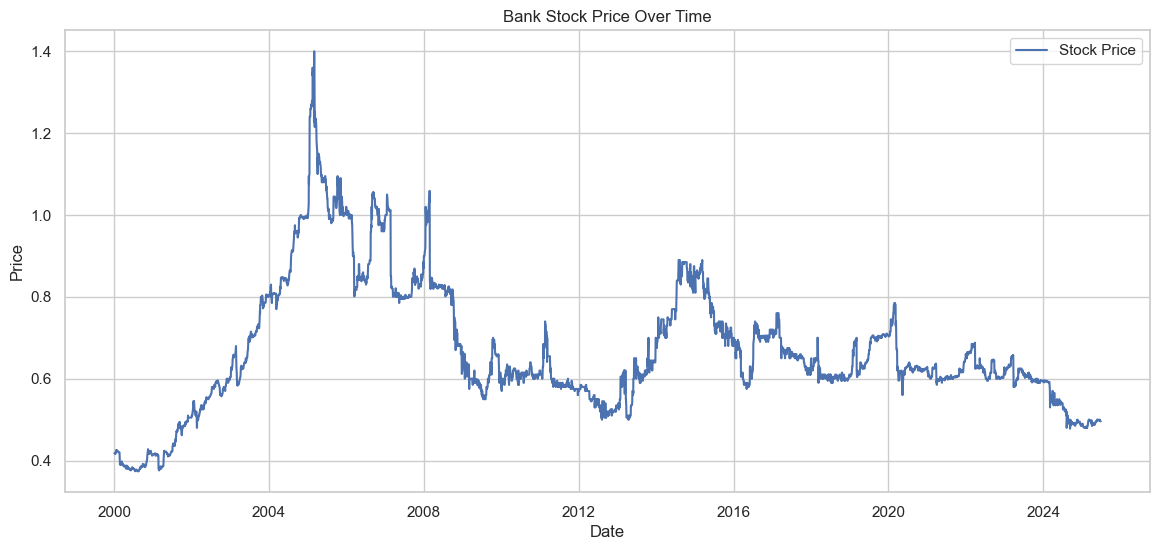

In [13]:
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Price'], label='Stock Price')
plt.title('Bank Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## 🔍 Seasonal-Trend Decomposition using STL

## 4️⃣ Visualize Closing Prices Over Time
We plot the closing prices of selected banks to visualize historical performance and detect trends.

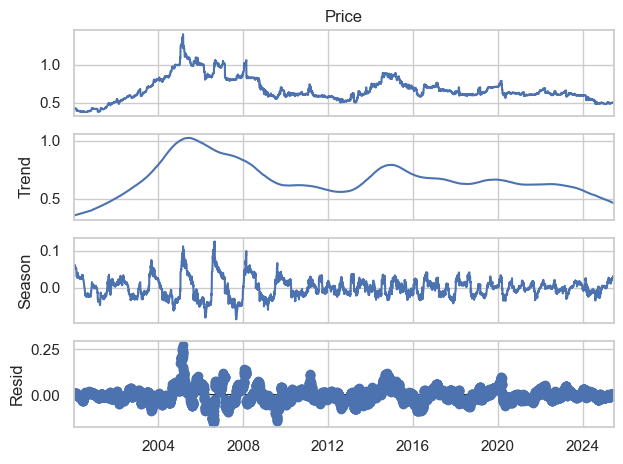

In [14]:
df.set_index('Date', inplace=True)
stl = STL(df['Price'], period=365)
res = stl.fit()
res.plot()
plt.show()
df.reset_index(inplace=True)

## 🔮 Forecasting with Facebook Prophet

## 5️⃣ Compare Moving Averages
We calculate **short-term** and **long-term moving averages** for each stock to identify bullish/bearish trends.
Moving averages help smooth out price fluctuations and highlight long-term patterns.

10:20:00 - cmdstanpy - INFO - Chain [1] start processing
10:20:01 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1400x600 with 0 Axes>

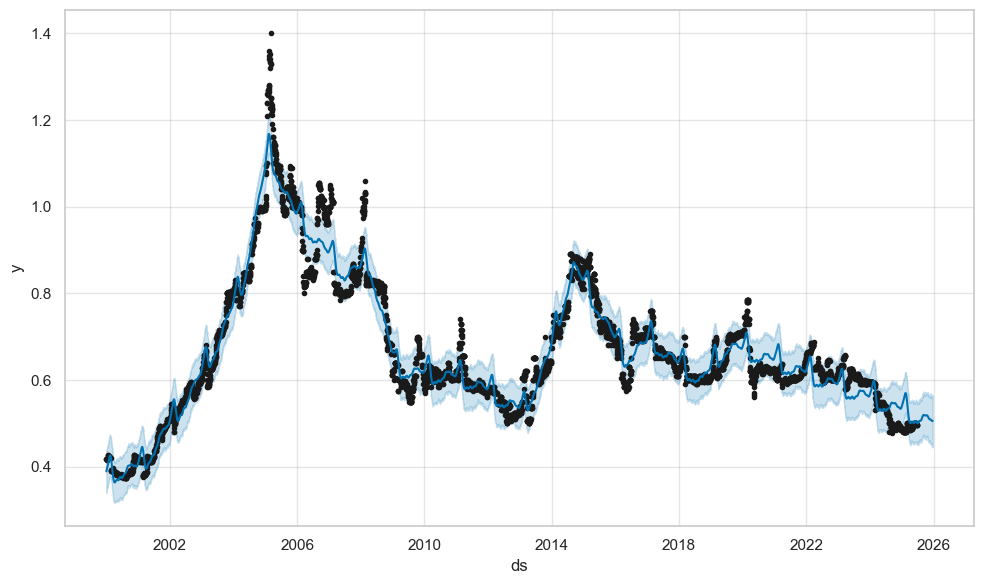

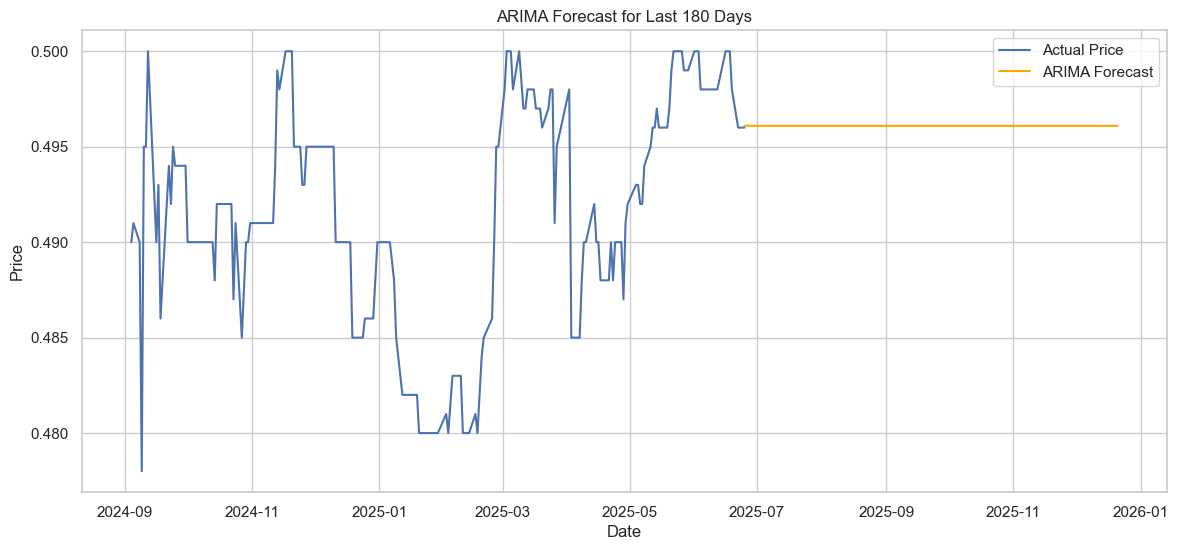

In [30]:
prophet_df = df.rename(columns={'Date': 'ds', 'Price': 'y'})
model = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)
model.fit(prophet_df)
future = model.make_future_dataframe(periods=180)  # Forecast for the next 260 days
forecast = model.predict(future)
plt.figure(figsize=(14, 6))
fig = model.plot(forecast)
plt.show()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

#focusing on the last 180 days
last_180_days = df.set_index('Date').tail(180)
arima_model = ARIMA(last_180_days['Price'], order=(5, 1, 0))
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=180)
plt.figure(figsize=(14, 6))
plt.plot(last_180_days.index, last_180_days['Price'], label='Actual Price')
plt.plot(pd.date_range(start=last_180_days.index[-1], periods=180, freq='D'), arima_forecast, label='ARIMA Forecast', color='orange')
plt.title('ARIMA Forecast for Last 180 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## ✅ Model Evaluation (Optional)

## 6️⃣ Correlation Analysis Between Banks
We compute the correlation matrix between stock returns to see how closely bank stocks move together.
A heatmap is used for easy interpretation.

In [ ]:
# Optionally split data for evaluation if desired

## 7️⃣ Cumulative Returns Analysis
We calculate the cumulative return for each bank's stock over time, which helps visualize total growth compared to the starting point.

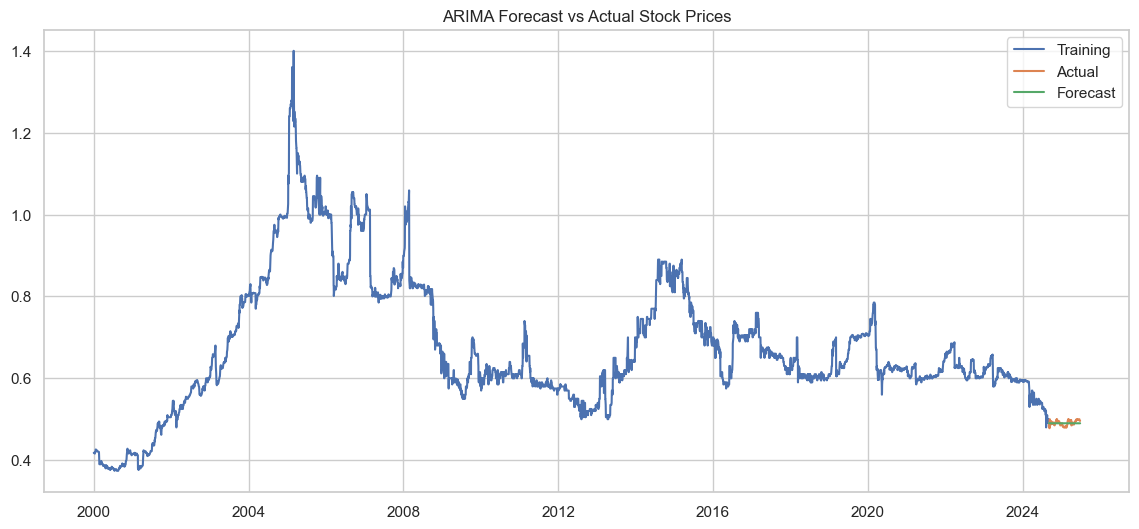

In [16]:
# Set Date as index for time series modeling
df.set_index('Date', inplace=True)

# Split into training and test sets (e.g., last 180 days for testing)
train = df['Price'][:-180]
test = df['Price'][-180:]

# Fit ARIMA model (p=5, d=1, q=0 is a starting point)
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Plot results
plt.figure(figsize=(14,6))
plt.plot(train.index, train, label='Training')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.title('ARIMA Forecast vs Actual Stock Prices')
plt.show()

# Reset index to keep dataset structure intact
df.reset_index(inplace=True)
